In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
train = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_train.csv")
test = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_test.csv")
submission = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\submission.csv")

In [4]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5,94,94,4,110500000
1,3,De Gea,27,europe,2020,GK,right,4,91,93,1,72000000
2,7,L. Suárez,31,south america,2021,ST,right,5,91,91,3,80000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4,91,91,3,51000000
4,9,J. Oblak,25,europe,2021,GK,right,3,90,93,1,68000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1,48,63,3,60000
8928,16936,C. Ehlich,19,europe,2020,DF,right,1,47,59,2,40000
8929,16941,N. Fuentes,18,south america,2021,DF,right,1,47,64,2,50000
8930,16942,J. Milli,18,europe,2021,GK,right,1,47,65,1,50000


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
train = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_train.csv")
test = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_test.csv")
submission = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\submission.csv")
train["log_value"] = np.log(train["value"])
dataset = train.values
test_dataset = test.values
X = dataset[:,8:11].astype(float)
Y = dataset[:,12].astype(float)

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)
model = Sequential()
model.add(Dense(14,input_dim=3,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train,Y_train,epochs=200,batch_size=10)

Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label =Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격:{:.3f}, 예상가격: {:.3f}".format(label,prediction))

Epoch 1/200
626/626 [==============================] - 1s 771us/step - loss: 0.3299
Epoch 2/200
626/626 [==============================] - 1s 816us/step - loss: 0.1750
Epoch 3/200
626/626 [==============================] - 0s 712us/step - loss: 0.1501
Epoch 4/200
626/626 [==============================] - 0s 725us/step - loss: 0.1332
Epoch 5/200
626/626 [==============================] - 0s 735us/step - loss: 0.1253
Epoch 6/200
626/626 [==============================] - 0s 727us/step - loss: 0.1228
Epoch 7/200
626/626 [==============================] - 0s 742us/step - loss: 0.1229
Epoch 8/200
626/626 [==============================] - 0s 744us/step - loss: 0.1217
Epoch 9/200
626/626 [==============================] - 0s 746us/step - loss: 0.1202
Epoch 10/200
626/626 [==============================] - 0s 735us/step - loss: 0.1205
Epoch 11/200
626/626 [==============================] - 0s 723us/step - loss: 0.1194
Epoch 12/200
626/626 [==============================] - 0s 743us/step - lo

626/626 [==============================] - 0s 769us/step - loss: 0.1092
Epoch 193/200
626/626 [==============================] - 0s 764us/step - loss: 0.1086
Epoch 194/200
626/626 [==============================] - 1s 878us/step - loss: 0.1096
Epoch 195/200
626/626 [==============================] - 1s 800us/step - loss: 0.1074
Epoch 196/200
626/626 [==============================] - 0s 758us/step - loss: 0.1084
Epoch 197/200
626/626 [==============================] - 0s 757us/step - loss: 0.1097
Epoch 198/200
626/626 [==============================] - 0s 783us/step - loss: 0.1080
Epoch 199/200
626/626 [==============================] - 0s 749us/step - loss: 0.1094
Epoch 200/200
84/84 [==============================] - 0s 670us/step
실제가격:13.653, 예상가격: 13.883
실제가격:13.764, 예상가격: 13.919
실제가격:13.710, 예상가격: 13.988
실제가격:16.588, 예상가격: 16.785
실제가격:12.899, 예상가격: 12.848
실제가격:13.998, 예상가격: 13.869
실제가격:11.983, 예상가격: 11.912
실제가격:15.830, 예상가격: 15.705
실제가격:13.653, 예상가격: 13.718
실제가격:12.388, 예상가격: 12.3

In [3]:
y_test

NameError: name 'y_test' is not defined

-이와 같이 오차가 발생하는 이유는 데이터간의 편차가 너무 심하다.\
-지금부터 해야할거
1.데이터 전처리\
 1). 데이터의 편차를 줄여주기\
 2). 범주형 값(문자열 타입): continent(국적),contract_until(계약기간),position(포지 션),prefer_foot(주발)\
 3). 수치형 값(정수형): age(나이),reputation(인지도),stat_overall(선수 능력치),stat_potential(발전 가능성),stat_skill_moves(개인기 능력치)
 4). 문자형 데이터들을 정수형으로 바꿔주기(방법 생각하기)\
 5). 데이터들과 클래스 간의 상관관계 확인\
 6). 상관관계가 없는 데이터들을 삭제하고 나머지 데이터들로 모델링

프로젝트개요
상세설명(ppt) 계획서
일정
업무분담
개발계획
검증

fifa 선수 이적료 예측 모델링

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6cfc64850>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6cfc64df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6cfc64580>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6cb96d3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6cb96d6a0>],
 'means': []}

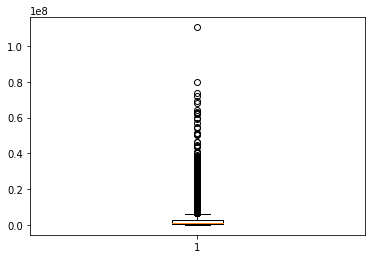

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
train = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_train.csv")
test = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_test.csv")
submission = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\submission.csv")
dataset = train.values
test_dataset = test.values
X = dataset[:,8:10].astype(float)
Y = dataset[:,11].astype(float)
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)
plt.boxplot(Y_train)

In [9]:
train.loc[train["contract_until"]=="2019-06-30","contract_until"] = 2018
train.loc[train["contract_until"]=="Dec 31, 2018","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2019","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="Jun 30, 2020","contract_until"] = 2019
train.loc[train["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
train.loc[train["contract_until"]=="May 31, 2020","contract_until"] = 2020
train.loc[train["contract_until"]=="Jan 12, 2019","contract_until"] = 2018

# "2019", 2019를 하나로 묶어주기 위한 타입 변화
train["contract_until"] = train["contract_until"].astype(int)

ValueError: invalid literal for int() with base 10: '30-Jun-19'

In [ ]:
t